# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a X-day low, buy with full capital.
    3. If the SPY closes at a X-day high, sell some.
       If it sets further highs, sell some more, etc...
    4. If you have free cash, use it all when fresh lows are set.
    
    (Scaling out)

In [1]:
# use future imports for python 3.x forward compatibility
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

# other imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

# project imports
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.now()

Define high low trade periods

In [4]:
period = 7

Define max number of positions to scale into

In [5]:
max_positions = 2

Run Strategy

In [6]:
s = strategy.Strategy(symbol, capital, start, end, period=period, max_positions=max_positions)
s.run()

Retrieve log DataFrames

In [7]:
tlog, dbal = s.get_logs()
stats = s.get_stats()

In [8]:
tlog.tail(10)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,symbol
168,2019-12-09,26.92,2019-12-23,27.77,0.85,342.55,403,12361.46,
169,2019-12-20,27.13,2019-12-23,27.77,0.64,2.56,4,12364.02,
170,2019-12-20,27.13,2019-12-24,28.66,1.53,622.71,407,12986.73,
171,2020-01-08,28.35,2020-01-21,28.95,0.60,243.00,405,13229.73,
172,2020-01-08,28.35,2020-01-24,29.22,0.87,352.35,405,13582.08,
173,2020-01-28,28.31,2020-02-18,29.23,0.92,382.72,416,13964.80,
174,2020-01-28,28.31,2020-02-19,29.75,1.44,599.04,416,14563.84,
175,2020-02-04,28.05,2020-02-19,29.75,1.70,1.70,1,14565.54,
176,2020-02-27,28.15,2020-03-25,26.31,-1.84,-802.24,436,13763.30,
177,2020-02-27,28.15,2020-04-06,26.34,-1.81,-789.16,436,12974.14,


In [9]:
dbal.tail()

,high,low,close,shares,cash,state
date,,,,,,
2020-04-20,22974.14,22974.14,22974.14,0,22974.14,-
2020-04-21,22974.14,22974.14,22974.14,0,22974.14,-
2020-04-22,22974.14,22974.14,22974.14,0,22974.14,-
2020-04-23,22974.14,22974.14,22974.14,0,22974.14,-
2020-04-24,22974.14,22974.14,22974.14,0,22974.14,-


Generate strategy stats - display all available stats

In [10]:
pf.print_full(stats)

start                                                   2007-03-08
end                                                     2020-04-24
beginning_balance                                            10000
ending_balance                                            22974.14
total_net_profit                                          12974.14
gross_profit                                              35419.48
gross_loss                                               -22445.34
profit_factor                                                 1.58
return_on_initial_capital                                   129.74
annual_return_rate                                            6.54
trading_period                           13 years 1 months 16 days
pct_time_in_market                                           29.54
total_num_trades                                               178
trades_per_year                                              13.56
num_winning_trades                                            

Equity curve

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [11]:
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

2007-03-08 00:00:00 BUY  260 GDX @ 38.35
2020-04-24 00:00:00 SELL 260 GDX @ 33.93


Plot Equity Curves: Strategy vs Benchmark

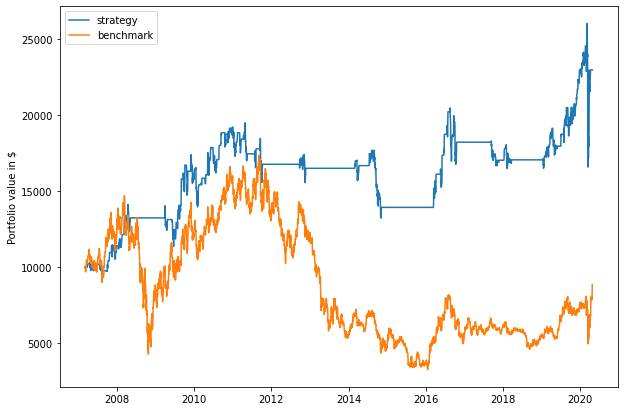

In [12]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

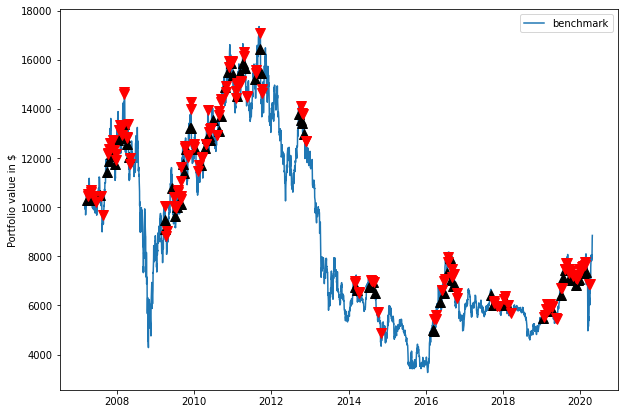

In [13]:
pf.plot_trades(dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,6.54,-0.93
max_closed_out_drawdown,-36.26,-81.15
drawdown_annualized_return,-5.54,87.69
drawdown_recovery,-0.02,-4.36
best_month,38.51,67.61
worst_month,-30.07,-52.01
sharpe_ratio,0.40,0.19
sortino_ratio,0.29,0.28
monthly_std,4.36,10.90


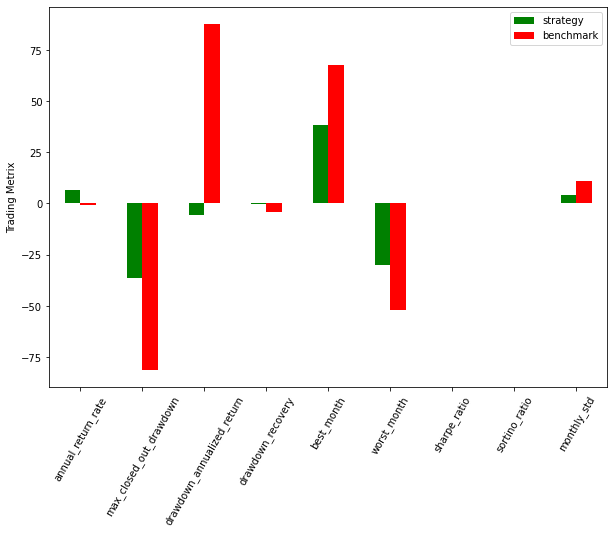

In [14]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std')

df = pf.plot_bar_graph(stats, benchmark.stats, *metrics)
df